In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [12]:
Base=automap_base()

In [13]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [22]:
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
columns_measurement = inspector.get_columns('measurement')
for c in columns_measurement:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [39]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
date = dt.datetime(2016, 8, 23)

results = session.query(Measurement.prcp, 
                        Measurement.date).\
                  filter(Measurement.date > date).all()

# List comprehension solution
prcp_rows = [{"Date": result[1], "Inches": result[0]} for result in results]
prcp_rows


 '2017-01-18', 'Inches': 0.0},
 {'Date': '2017-01-19', 'Inches': 0.0},
 {'Date': '2017-01-20', 'Inches': 0.0},
 {'Date': '2017-01-21', 'Inches': 0.04},
 {'Date': '2017-01-22', 'Inches': 0.01},
 {'Date': '2017-01-23', 'Inches': 0.08},
 {'Date': '2017-01-24', 'Inches': 0.15},
 {'Date': '2017-01-25', 'Inches': 0.12},
 {'Date': '2017-01-26', 'Inches': 0.0},
 {'Date': '2017-01-27', 'Inches': 0.0},
 {'Date': '2017-01-28', 'Inches': 0.14},
 {'Date': '2017-01-29', 'Inches': 0.0},
 {'Date': '2017-01-30', 'Inches': 0.0},
 {'Date': '2017-01-31', 'Inches': 0.0},
 {'Date': '2017-02-01', 'Inches': 0.0},
 {'Date': '2017-02-02', 'Inches': 0.0},
 {'Date': '2017-02-03', 'Inches': 0.0},
 {'Date': '2017-02-04', 'Inches': 0.0},
 {'Date': '2017-02-05', 'Inches': 0.0},
 {'Date': '2017-02-06', 'Inches': 0.16},
 {'Date': '2017-02-07', 'Inches': 1.08},
 {'Date': '2017-02-08', 'Inches': 1.08},
 {'Date': '2017-02-09', 'Inches': 0.02},
 {'Date': '2017-02-10', 'Inches': 0.0},
 {'Date': '2017-02-11', 'Inches': 1.0},

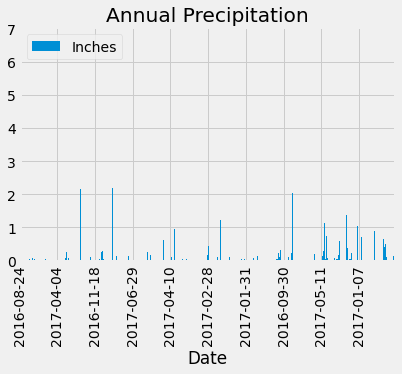

<Figure size 432x288 with 0 Axes>

In [96]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame(prcp_rows).set_index("Date").plot.bar()
plt.locator_params(axis='x', nbins=10)
plt.title("Annual Precipitation")
plt.xticks(rotation=90)
plt.show()
plt.savefig("precipitation.jpg")

# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number stations in the dataset
total_Stations = session.query(Measurement).group_by(Measurement.station).count()
print(total_Stations)

9


In [73]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_station = session.query(Measurement.station, \
                        func.count(Measurement.station).label('count'))\
    .group_by(Measurement.station).all()

for x in active_station:
    print(x.station, x.count)

USC00511918 1979
USC00513117 2709
USC00514830 2202
USC00516128 2612
USC00517948 1372
USC00518838 511
USC00519281 2772
USC00519397 2724
USC00519523 2669


In [91]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

tobs = session.query(*sel).\
    filter(func.strftime("%Y", Measurement.date) == "2016").filter(Measurement.station=='USC00519281').\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
tobs

[('USC00519281', 56.0, 82.0, 73.10109289617486)]

In [92]:
date = dt.datetime(2016, 8, 23)

results = session.query(Measurement.tobs, Measurement.station, Measurement.date).\
                  filter(Measurement.date > date).filter(Measurement.station == 'USC00519281').all()
histogram_rows = [{"Date": result[1], "Temperature": result[0]} for result in results]
histogram_rows

[{'Date': 'USC00519281', 'Temperature': 77.0},
 {'Date': 'USC00519281', 'Temperature': 80.0},
 {'Date': 'USC00519281', 'Temperature': 80.0},
 {'Date': 'USC00519281', 'Temperature': 75.0},
 {'Date': 'USC00519281', 'Temperature': 73.0},
 {'Date': 'USC00519281', 'Temperature': 78.0},
 {'Date': 'USC00519281', 'Temperature': 77.0},
 {'Date': 'USC00519281', 'Temperature': 78.0},
 {'Date': 'USC00519281', 'Temperature': 80.0},
 {'Date': 'USC00519281', 'Temperature': 80.0},
 {'Date': 'USC00519281', 'Temperature': 78.0},
 {'Date': 'USC00519281', 'Temperature': 78.0},
 {'Date': 'USC00519281', 'Temperature': 78.0},
 {'Date': 'USC00519281', 'Temperature': 73.0},
 {'Date': 'USC00519281', 'Temperature': 74.0},
 {'Date': 'USC00519281', 'Temperature': 80.0},
 {'Date': 'USC00519281', 'Temperature': 79.0},
 {'Date': 'USC00519281', 'Temperature': 77.0},
 {'Date': 'USC00519281', 'Temperature': 80.0},
 {'Date': 'USC00519281', 'Temperature': 76.0},
 {'Date': 'USC00519281', 'Temperature': 79.0},
 {'Date': 'US

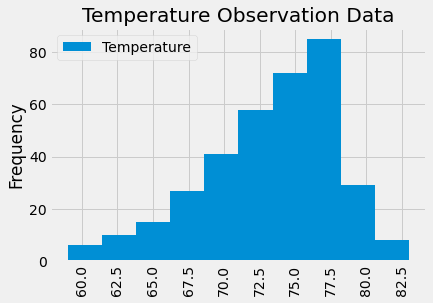

<Figure size 432x288 with 0 Axes>

In [95]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
pd.DataFrame(histogram_rows).set_index("Date").plot.hist()
plt.locator_params(axis='x', nbins=12)
plt.title("Temperature Observation Data")
plt.xticks(rotation=90)
plt.show()
plt.savefig("temp_obs.jpg")

# Close session

In [97]:
# Close Session
session.close()